In [1]:
import random
import umap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits,load_wine
from sklearn.decomposition import NMF,FastICA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
def plot_reduced_data(embedding, color_col):
    plt.figure(dpi=150)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=color_col, cmap='rainbow', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    n = len(np.unique(color_col))
    plt.colorbar(boundaries=np.arange(n+1)-0.5).set_ticks(np.arange(n)) 

In [3]:
#A) Use 2 other dimensionality reduction techniques (other than PCA nad UMAP) 
#on the digits dataset (2 pts)

In [4]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
print(digits.data.shape)

(1797, 64)


In [ ]:
nmf = NMF(n_components=2, init='random', random_state=0)
nmf_reduced = nmf.fit_transform(digits.data)

In [7]:
print(nmf_reduced.shape)

(1797, 2)


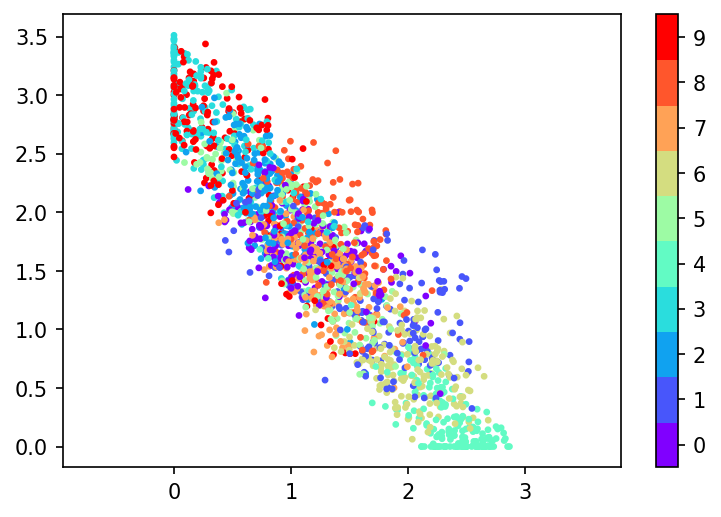

In [8]:
plot_reduced_data(nmf_reduced, digits.target)

In [9]:
ica = FastICA(n_components=2, random_state=0)
ica_reduced = ica.fit_transform(digits.data)

In [10]:
print(ica_reduced.shape)

(1797, 2)


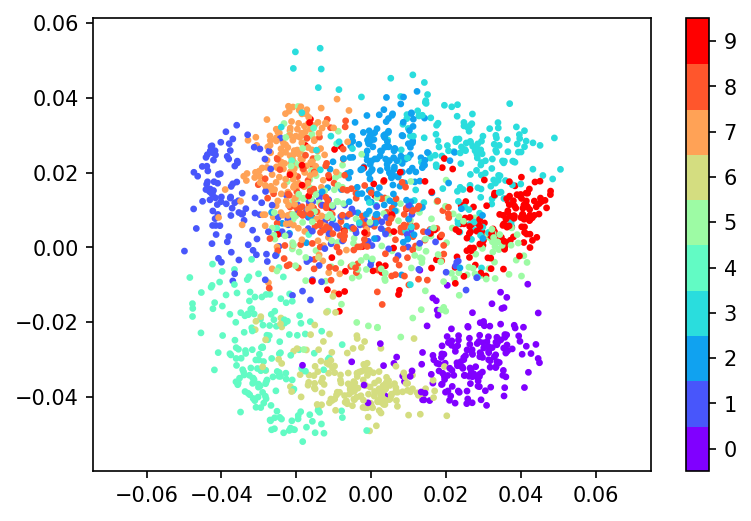

In [11]:
plot_reduced_data(ica_reduced, digits.target)

In [12]:
#B) Use 2 other dimensionality reduction techniques (other than PCA nad UMAP) 
#on the other dataset than digits (2 pts)

In [13]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [14]:
wine.data[0:11]
print(wine.data.shape)

(178, 13)


In [15]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [16]:
nmf_2 = NMF(n_components=2, init='random', random_state=0)
nmf_reduced_2 = nmf.fit_transform(wine.data)

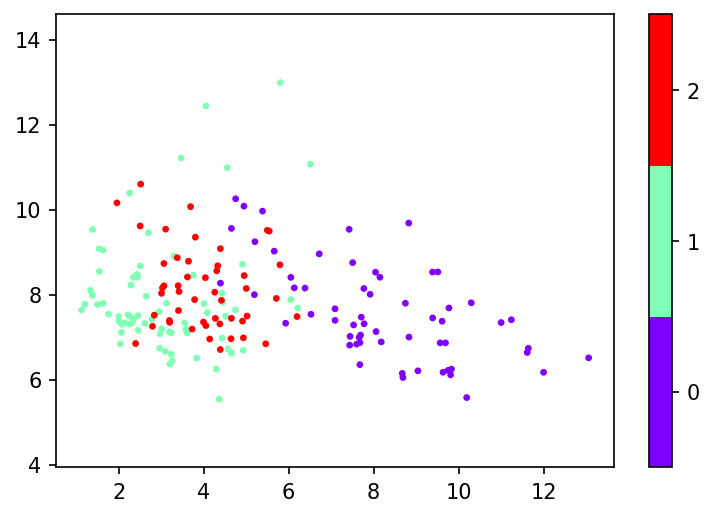

In [17]:
plot_reduced_data(nmf_reduced_2, wine.target)

In [18]:
ica_2 = FastICA(n_components=2, random_state=0)
ica_reduced_2 = ica_2.fit_transform(wine.data)

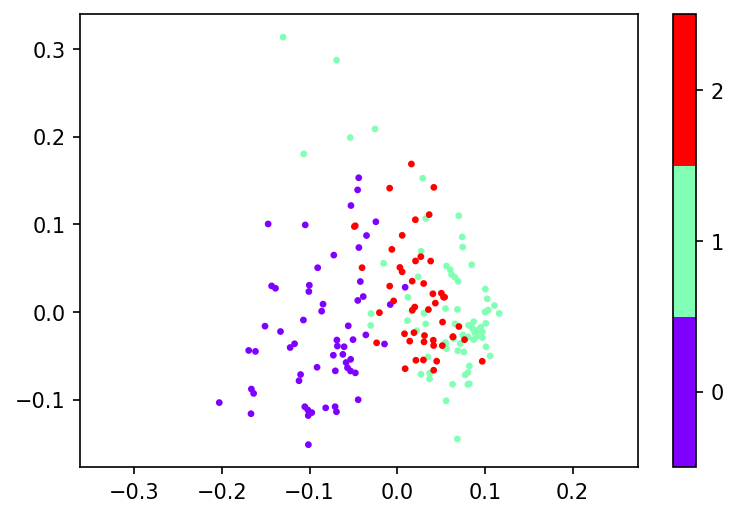

In [19]:
plot_reduced_data(ica_reduced_2, wine.target)

In [20]:
#C) Use 1 other clustering technique on Iris dataset plot the results with UMAP (1 pt)

In [21]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, names = ['sepal_length','sepal_width','petal_length','petal_width','species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
species = df.species
df = df.drop('species', axis = 1)

In [23]:
df = pd.DataFrame(StandardScaler().fit(df).transform(df))

In [24]:
dbscan = DBSCAN(eps=.95).fit(df)
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [25]:
model = umap.UMAP(n_neighbors=10,random_state=42)
umap_embedding = model.fit(df).transform(df)

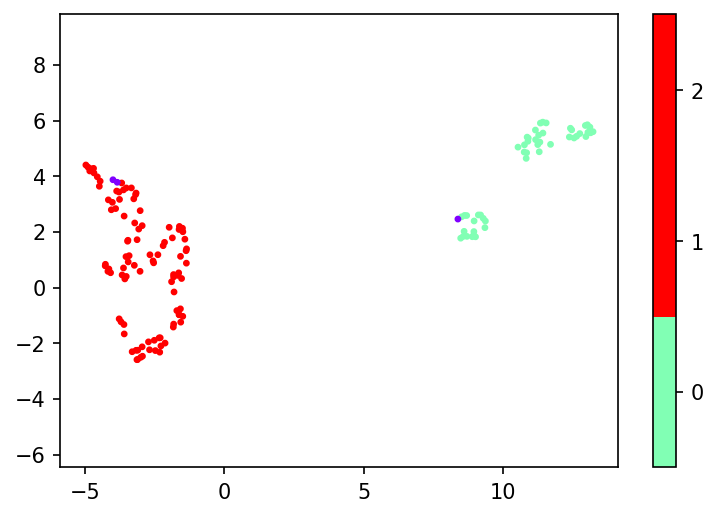

In [26]:
plot_reduced_data(umap_embedding, dbscan.labels_)